In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from rhessys import utilities as rut
%matplotlib inline

In [2]:
files = glob.glob('/Volumes/data/Theo/projects/greenness_timing/data/AFX2/flux/*.dat')

In [3]:
files

['/Volumes/data/Theo/projects/greenness_timing/data/AFX2/flux/flux_1998_ver.2011.04.20.dat',
 '/Volumes/data/Theo/projects/greenness_timing/data/AFX2/flux/flux_1999_ver.2011.04.20.dat',
 '/Volumes/data/Theo/projects/greenness_timing/data/AFX2/flux/flux_2000_ver.2011.04.20.dat',
 '/Volumes/data/Theo/projects/greenness_timing/data/AFX2/flux/flux_2001_ver.2011.04.20.dat',
 '/Volumes/data/Theo/projects/greenness_timing/data/AFX2/flux/flux_2002_ver.2011.04.20.dat',
 '/Volumes/data/Theo/projects/greenness_timing/data/AFX2/flux/flux_2003_ver.2011.04.20.dat',
 '/Volumes/data/Theo/projects/greenness_timing/data/AFX2/flux/flux_2004_ver.2011.04.20.dat',
 '/Volumes/data/Theo/projects/greenness_timing/data/AFX2/flux/flux_2005_ver.2011.04.20.dat',
 '/Volumes/data/Theo/projects/greenness_timing/data/AFX2/flux/flux_2006_ver.2011.04.20.dat',
 '/Volumes/data/Theo/projects/greenness_timing/data/AFX2/flux/flux_2007_ver.2011.04.20.dat',
 '/Volumes/data/Theo/projects/greenness_timing/data/AFX2/flux/flux_200

In [4]:
head = ['Year','MO','DD','HR','MM','SS','Decimal Date','Fco2_21m_','Fco2_21m_','Strg_co2','u_w_21m','Taua_21m','Qh_21m',
        'Qe_21m','w_h2o_21m','Qh_soil','Strg_Qh','Strg_Qe','Strg_bole','Strg_need']

In [5]:
afx = pd.DataFrame(columns=head)

for fl in files:
    tmp = pd.read_table(fl,delim_whitespace=True,names=head)
    afx = afx.append(tmp)

In [6]:
def parsedate(x):
    return pd.datetools.datetime(int(x.Year),int(x.MO),int(x.DD),int(x.HR),int(x.MM))

In [7]:
afx.index = pd.DatetimeIndex(afx.apply(parsedate,axis=1)) # create a datetime index

In [8]:
afx.sort_index(inplace=True)

In [9]:
afx['idx'] = np.arange(0,len(afx))

In [10]:
del afx['Year']
del afx['MO']
del afx['DD']
del afx['HR']
del afx['MM']
del afx['SS']

## Read in the flux tower climate data

In [11]:
files = glob.glob('/Volumes/data/Theo/projects/greenness_timing/data/AFX2/clim/*.dat')

In [12]:
head = ['Year','MO','DD','HR','MM','SS','Decimal Date','T_21m','RH_21m','P_bar_12m','ws_21m','wd_21m','ustar_21m','z_L_21m',
        'precip_mm','Td_21m','vpd','wet_b','T_soil','T_bole_pi','T_bole_fi','T_bole_sp','Rppfd_in_','Rppfd_out','Rnet_25m_',
        'Rsw_in_25','Rsw_out_2','Rlw_in_25','Rlw_out_2','T_2m','T_8m','RH_2m','RH_8m','h2o_soil','co2_21m']

In [13]:
afx_clim = pd.DataFrame(columns=head)

for fl in files:
    tmp = pd.read_table(fl,delim_whitespace=True,names=head,usecols=np.arange(0,35))
    afx_clim = afx_clim.append(tmp)

In [14]:
afx_clim.index = pd.DatetimeIndex(afx_clim.apply(parsedate,axis=1)) # create a datetime index

In [15]:
afx_clim.sort_index(inplace=True)

In [16]:
afx_clim['idx'] = np.arange(0,len(afx_clim))

In [17]:
del afx_clim['Year']
del afx_clim['MO']
del afx_clim['DD']
del afx_clim['HR']
del afx_clim['MM']
del afx_clim['SS']

In [18]:
afx = pd.merge(afx,afx_clim,on='idx',left_index=True)

In [19]:
afx.head()

,Decimal Date_x,Fco2_21m_,Fco2_21m_,Strg_co2,u_w_21m,Taua_21m,Qh_21m,Qe_21m,w_h2o_21m,Qh_soil,...,Rsw_in_25,Rsw_out_2,Rlw_in_25,Rlw_out_2,T_2m,T_8m,RH_2m,RH_8m,h2o_soil,co2_21m
1998-11-01 00:15:00,305.010417,-0.675,-0.675,NaN,-0.289,0.260,-0.593,-4.340,-0.097,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-11-01 00:45:00,305.031250,-0.675,-0.675,NaN,-0.289,0.260,-0.593,-4.340,-0.097,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-11-01 01:15:00,305.052083,-0.511,-0.511,NaN,-0.162,0.146,-7.340,2.980,0.066,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-11-01 01:45:00,305.072917,-0.511,-0.511,NaN,-0.162,0.146,-7.340,2.980,0.066,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-11-01 02:15:00,305.093750,-0.315,-0.315,NaN,-0.193,0.174,-5.130,-0.818,-0.018,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
def le2etEC(x):
    #Apply on daily total LE [W/m2]
    # from Ecological Climatology p.193
    cond = 2500.8-(2.36*x.T_21m)+(0.0016*(x.T_21m**2))+(0.00006*(x.T_21m**3)) #J/g latent head as a fxn of temperature
    cond *= 1000. # convert J/g -> J/kg
    #hv = 2.454*(10**6) # latent heat of vaporization
    ET = x.Qe_21m/cond # compute ET as kg/m2/s
    ET *= 86400. # number of seconds in a day
    
    return ET  # mm/m2

In [21]:
def mmol2ET(x):
    # convert from mmol H2O/s/m2 --> mm/day/m2
    ET = x*60.*60.*24. # multiply by the number of seconds in a day
    ET /= 1000. # convert mmol to mol
    ET /= 18.01528 # convert mol to g [g/mol]
    ET /= 1000. # convert g to kg
    
    # final units are kg/m2 or mm/m2
    
    return ET

In [22]:
afx2 = afx.resample('D', how='mean')

In [23]:
afx2['ET'] = afx2.apply(le2etEC,axis=1)

In [25]:
#afx2['ET2'] = afx2.w_h2o_21m.map(mmol2ET) 

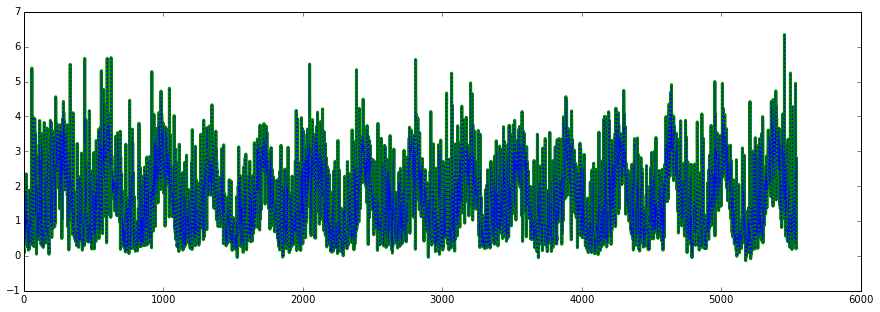

In [27]:
plt.figure(figsize=(15,5))
plt.plot(afx2.w_h2o_21m*1.56,'g',lw=3) # coef from Naomi Tague
plt.plot(afx2.ET,':b')
#plt.plot(afx2.ET2,'r')

In [28]:
afx2['wateryear'] = afx2.index.map(rut.wateryear)

In [30]:
afx3 = afx2.groupby(by='wateryear').sum()

In [31]:
afx3[['w_h2o_21m','ET']]

,w_h2o_21m,ET
wateryear,,
1999,392.910229,610.503197
2000,423.027875,657.184445
2001,396.444208,615.841479
2002,351.508396,545.995341
2003,347.569604,539.871866
2004,381.862250,593.260947
2005,341.330250,530.157839
2006,385.838000,599.414299
2007,394.892083,613.460995


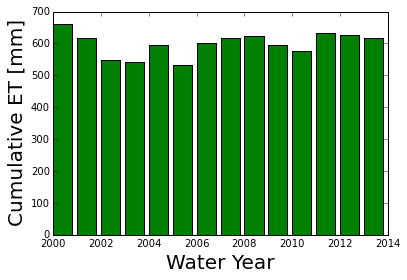

In [33]:
plt.bar(afx3.index[1:-1],afx3.w_h2o_21m[1:-1])
plt.bar(afx3.index[1:-1],afx3.w_h2o_21m[1:-1]*1.56,facecolor='g')
#plt.ylim(380,390)
plt.ylabel('Cumulative ET [mm]', fontsize=20)
plt.xlabel('Water Year', fontsize = 20)

In [36]:
#afx['tot_LE'] = afx.Qe_21m*(60.*30) # multiply the average latent heat flux by the number of seconds in the period [J]

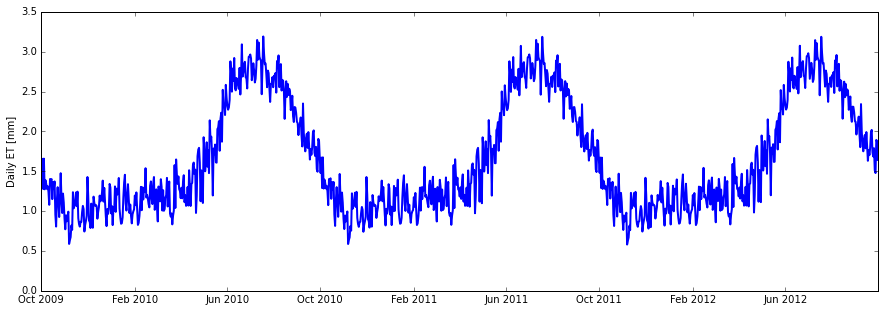

In [23]:
strt = '2009-10-01'
nd = '2012-9-30'

plt.figure(figsize=(15,5))
plt.plot(afx2[strt:nd].index,afx2[strt:nd].ET,'-b',lw=2)
#plt.plot(afx2[strt:nd].index,afx2[strt:nd].ET1,'-k',lw=2)
#plt.plot(afx2[strt:nd].index,afx2[strt:nd].Qe_21m,'-k',lw=2)
plt.ylabel('Daily ET [mm]')
plt.axhline(0,c='k')

In [34]:
afx2.to_pickle('./data/AFX2_new.pcl')

In [25]:
afx2.columns

Index([u'Decimal Date', u'Fco2_21m_', u'Fco2_21m_', u'Strg_co2', u'u_w_21m',
       u'Taua_21m', u'Qh_21m', u'Qe_21m', u'w_h2o_21m', u'Qh_soil', u'Strg_Qh',
       u'Strg_Qe', u'Strg_bole', u'Strg_need', u'T_21m', u'RH_21m',
       u'P_bar_12m', u'ws_21m', u'wd_21m', u'ustar_21m', u'z_L_21m',
       u'precip_mm', u'Td_21m', u'vpd', u'wet_b', u'T_soil', u'T_bole_pi',
       u'T_bole_fi', u'T_bole_sp', u'Rppfd_in_', u'Rppfd_out', u'Rnet_25m_',
       u'Rsw_in_25', u'Rsw_out_2', u'Rlw_in_25', u'Rlw_out_2', u'T_2m',
       u'T_8m', u'RH_2m', u'RH_8m', u'h2o_soil', u'co2_21m', u'ET'],
      dtype='object')

In [ ]:
Rsw_in_25m_KZ